In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Data set preparation and cleaning

In [2]:
df = pd.read_csv("TestData.csv")
df.head(10)

,customer_id,country,tenure,SAP Advanced Planner and Optimizer,SAP Cost Center Accounting,SAP Enterprise Learning,active_member,Customer feedback Ratings,churn
0,15634602,France,2,1,0,1,1,3,1
1,15647311,Spain,1,0,1,1,1,3,0
2,15619304,France,8,0,1,0,0,5,1
3,15701354,France,1,1,1,1,0,1,0
4,15737888,Spain,2,1,0,0,1,3,0
5,15574012,Spain,8,0,1,0,0,3,1
6,15592531,France,7,0,1,0,1,4,0
7,15656148,Germany,4,0,1,0,0,2,1
8,15792365,France,4,0,1,0,1,1,0
9,15592389,France,2,0,0,1,1,2,0


In [3]:
df.drop(['customer_id'], inplace =True, axis = 1)

In [4]:
df.head()

,country,tenure,SAP Advanced Planner and Optimizer,SAP Cost Center Accounting,SAP Enterprise Learning,active_member,Customer feedback Ratings,churn
0,France,2,1,0,1,1,3,1
1,Spain,1,0,1,1,1,3,0
2,France,8,0,1,0,0,5,1
3,France,1,1,1,1,0,1,0
4,Spain,2,1,0,0,1,3,0


In [5]:
df.columns.values.tolist()

['country',
 'tenure',
 'SAP Advanced Planner and Optimizer',
 'SAP Cost Center Accounting',
 'SAP Enterprise Learning',
 'active_member',
 'Customer feedback Ratings',
 'churn']

In [6]:
df.shape

(10000, 8)

Columns to remove:
    1. credit_score
    2. balance
    3. credit_card
    4. estimated_salary

In [7]:
df.dtypes

country                               object
tenure                                 int64
SAP Advanced Planner and Optimizer     int64
SAP Cost Center Accounting             int64
SAP Enterprise Learning                int64
active_member                          int64
Customer feedback Ratings              int64
churn                                  int64
dtype: object

Check if any duplicates in dataset

Check columns list and missing values

In [8]:
df.isnull().sum()

country                               0
tenure                                0
SAP Advanced Planner and Optimizer    0
SAP Cost Center Accounting            0
SAP Enterprise Learning               0
active_member                         0
Customer feedback Ratings             0
churn                                 0
dtype: int64

Get unique count for each variable

In [9]:
df.nunique()

country                                3
tenure                                11
SAP Advanced Planner and Optimizer     2
SAP Cost Center Accounting             2
SAP Enterprise Learning                2
active_member                          2
Customer feedback Ratings              5
churn                                  2
dtype: int64

Data set visualization

In [10]:
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

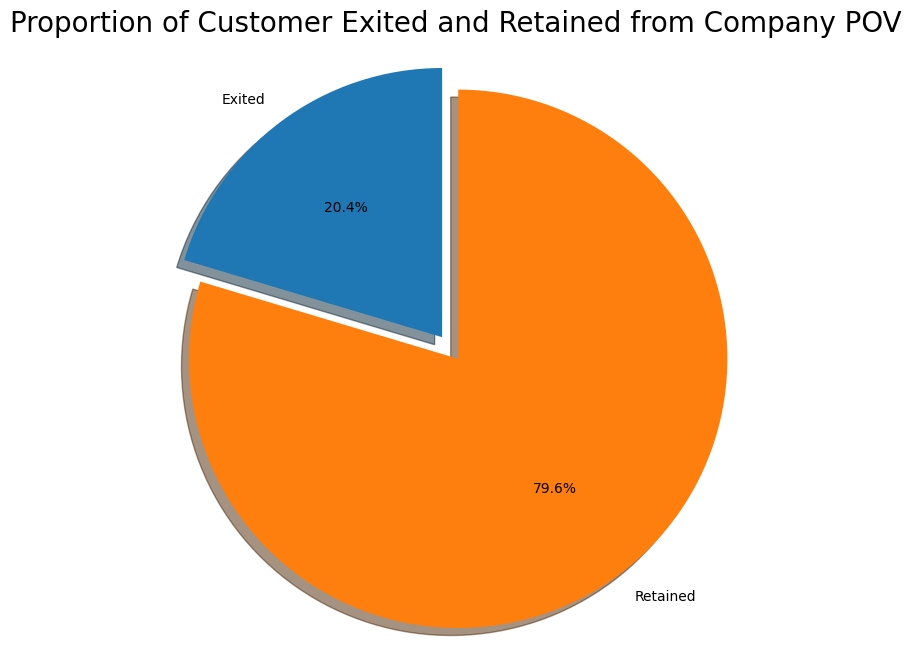

In [11]:
labels = 'Exited', 'Retained'
sizes = [df.churn[df['churn']==1].count(), df.churn[df['churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Customer Exited and Retained from Company POV", size = 20)
plt.show()

Decision Tree

In [54]:
df = pd.get_dummies(data=df,columns=['country','Customer feedback Ratings'])
df.head()

,tenure,SAP Advanced Planner and Optimizer,SAP Cost Center Accounting,SAP Enterprise Learning,active_member,churn,country_0,country_1,country_2,Customer feedback Ratings_1,Customer feedback Ratings_2,Customer feedback Ratings_3,Customer feedback Ratings_4,Customer feedback Ratings_5
0,2,1,0,1,1,1.0,0,1,0,0,0,1,0,0
1,1,0,1,1,1,0.0,0,0,1,0,0,1,0,0
2,8,0,1,0,0,1.0,0,1,0,0,0,0,0,1
3,1,1,1,1,0,0.0,0,1,0,1,0,0,0,0
4,2,1,0,0,1,0.0,0,0,1,0,0,1,0,0


In [62]:
df.head(15)

,tenure,SAP Advanced Planner and Optimizer,SAP Cost Center Accounting,SAP Enterprise Learning,active_member,churn,country_0,country_1,country_2,Customer feedback Ratings_1,Customer feedback Ratings_2,Customer feedback Ratings_3,Customer feedback Ratings_4,Customer feedback Ratings_5
0,2,1,0,1,1,1.0,0,1,0,0,0,1,0,0
1,1,0,1,1,1,0.0,0,0,1,0,0,1,0,0
2,8,0,1,0,0,1.0,0,1,0,0,0,0,0,1
3,1,1,1,1,0,0.0,0,1,0,1,0,0,0,0
4,2,1,0,0,1,0.0,0,0,1,0,0,1,0,0
5,8,0,1,0,0,1.0,0,0,1,0,0,1,0,0
6,7,0,1,0,1,0.0,0,1,0,0,0,0,1,0
7,4,0,1,0,0,1.0,1,0,0,0,1,0,0,0
8,4,0,1,0,1,0.0,0,1,0,1,0,0,0,0
9,2,0,0,1,1,0.0,0,1,0,0,1,0,0,0


In [58]:
X = df.drop(['churn'], axis=1)
y = df['churn']
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score,f1_score
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=20, test_size=0.1)
from sklearn.tree import DecisionTreeClassifier
dtree_product3 = DecisionTreeClassifier()
dtree_product3.fit(X_train, y_train)
y_pred = dtree_product3.predict(X_test)
print("Accuracy Score using Decision Tree :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score using Decision Tree : 77.3 %


Support Vector Machines

In [59]:
X = df.drop('churn', axis=1)
y = df['churn']
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=20, test_size=0.1)
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy Score using Support Vector Machine :", accuracy_score(y_test, y_pred)*100, "%")


Accuracy Score using Support Vector Machine : 82.3 %


Linear Discriminant Analysis


In [61]:
X = df.drop('churn', axis=1)
y = df['churn']
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10, test_size=0.1)
ldamodel1 = LinearDiscriminantAnalysis()
ldamodel1.fit(X_train, y_train)
y_pred = ldamodel1.predict(X_test)
print("Accuracy Score using Linear Discriminant Analysis :", accuracy_score(y_test, y_pred)*100, "%")


Accuracy Score using Linear Discriminant Analysis : 77.9 %


In [37]:
import pickle


In [253]:
pickle.dump(svm_product1, open('svm_model.pkl', 'wb'))

In [254]:
pickle.dump(ldamodel1, open('lda_model.pkl', 'wb'))

In [46]:
pickle_model = pickle.load(open('decisionTree_model.pkl','rb'))
predicted = pickle_model.predict([[0,1,0,1,0,0,1]])
print(predicted)
probability = pickle_model.predict_proba([[0,1,0,1,0,0,1]])[:,1]
print(probability)

[1]
[1.]


c:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [7]:
import pickle
pickle_model = pickle.load(open('../Final_Model_pickle/TestData_model.pkl','rb'))
predicted = pickle_model.predict([[0,3,1,0,1,0,1]])
print(predicted)
probability = pickle_model.predict_proba([[0,3,1,0,1,0,1]])[:,1]
print(probability)

[1]
[0.8]


c:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\I526751\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[0,1,1,1,0,1,1] => 1
[0,1,1,0,1,0,1] => 1
[0,3,1,0,1,0,1] => 1
[0,3,1,0,1,0,1] => 1
[0,3,1,0,1,0,4] => 0
[1,1,0,1,1,1,5] => 0
[0,9,1,1,1,1,5] => 0
[0,1,0,0,1,1,1] => 1    
[0,1,0,1,0,0,1] => 1